# LOAD THE DATASET

In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\AVANI S\\Downloads\\Titanic-Dataset.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DATA CLEANING

In [3]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# HANDLING MISSING VALUES

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [6]:
df.drop(['Cabin'], axis=1, inplace=True)

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# CONVERT CATEGORICAL VARIABLES (CONVERT SEX AND EMBARKED TO NUMERICAL)

In [8]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [9]:
df.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.086420,0.725028
std,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


# REMOVING UNNECESSARY COLUMNS

In [10]:
df.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)


In [12]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,0.086420,0.725028
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.281141,0.446751
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


# EDA

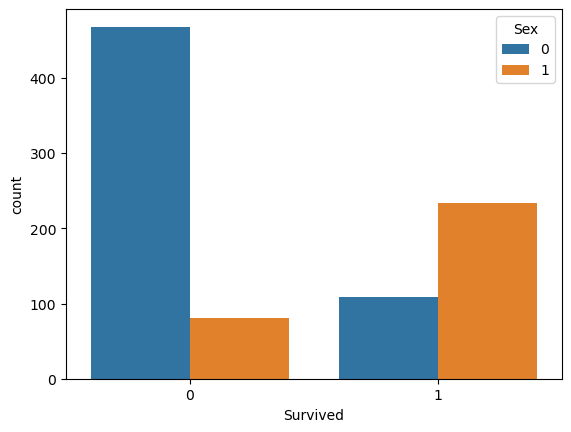

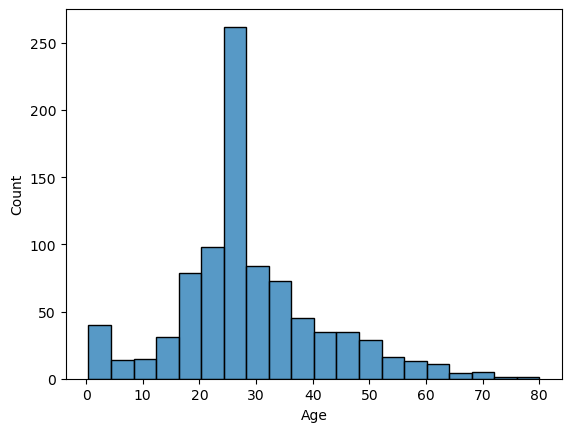

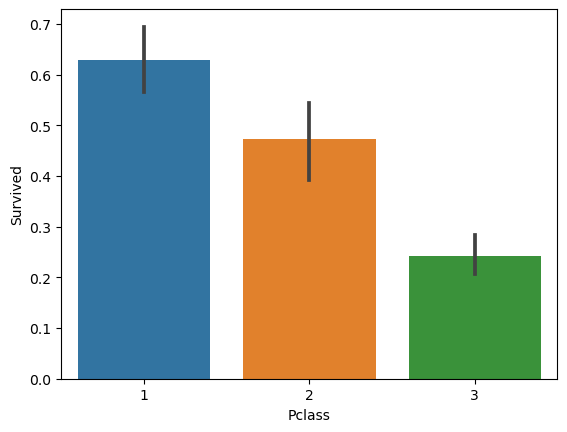

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.show()

# Age distribution
sns.histplot(df['Age'], bins=20)
plt.show()

# Survival based on passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()


# Correlation between Variables 

(Understand how different variables correlate with each other.)

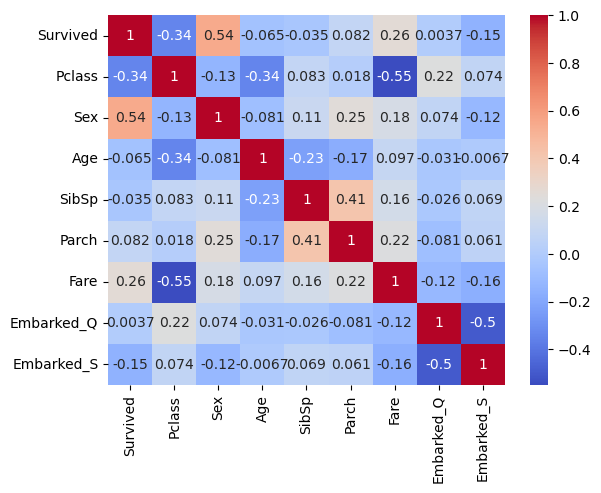

In [14]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()


points
1. There is a strong positive correlation (0.54) between Survived and Sex. This indicates that females were more likely to survive than males.
2. There is a negative correlation (-0.34) between Survived and Pclass. This means that passengers in higher classes (Pclass 1) had a better chance of survival compared to those in lower classes